## Importing the necessary libraries

In [150]:
#basic libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
import pandas as pd
import re

In [151]:
#text processing libraries
import nltk

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer


#stopwords
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from string import punctuation
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

## Loading the training dataset

Here the dataset of all tweets is loaded and blank fields are filled with the empty string. Also, two other columns *tokenized_text* and *tokenized_key* are created to store the tokenized words for both text sentence of the tweet and the keywords, respectively.

In [152]:
data = pd.read_csv('./train.csv')
data.fillna('', inplace=True)

data['tokenized_text'] = " "
data['tokenized_key'] = " "

## Creating the STOPWORDS

*stop_words*, *punctuation*, *gensimwords*, *sklearnwords*, *num_pattern* are regarded as general words like she, he, I will be ignored. Also, *punctuation* referred for the punctuations like ",?!#@, etc. *gensimwords* and *sklearnwords* are the extended version of words like nonetheless, although, otherwise, etc. *num_pattern* finds the numbers and replaces with the empty string.

In [153]:
stop_words = set(stopwords.words('english'))
punctuation = list(punctuation)
gensimwords = STOPWORDS
sklearnwords = ENGLISH_STOP_WORDS
num_pattern = r'[0-9]'

# Function to tokenize/split the words and ignore the STOPWORDS

Here *PorterStemmer* is an object to get the root or basis of words. For instance, playing will be considered as play, cats as cat. Using the functional library *word_tokenize*, the sentence is converted into the tokens or split words and afterwards, the STOPWORDS and stemming are done.

In [154]:

porter = PorterStemmer()
def tokenized_stop(string):
    string = re.sub(num_pattern, '', string)
    string = re.sub(r'http\S+', '', string)
    
    #tokenizing the words
    string = word_tokenize(string)
    
    #ignoring the unnecessary words
    string_list = []
    for words in string:
        words = words.casefold()
        if (words in stop_words) or (words in punctuation) or (words in gensimwords) or (words in sklearnwords):
            pass
        else:
            words = porter.stem(words)
            string_list.append(words)
             
    return string_list



## Storing the tokenized sentence and keywords to newly created columns

In [155]:
for i in range(len(data['text'])):
    data.at[i,'tokenized_text'] = tokenized_stop(data['text'][i])
    data.at[i,'tokenized_key'] = tokenized_stop(data['keyword'][i])

## Combining all the words into one list

In [156]:
all_words=[]
all_keys=[]
for i in range(len(data['tokenized_text'])):
    all_words=all_words + data['tokenized_text'][i]
    all_keys=all_keys + data['tokenized_key'][i]
all_words=pd.DataFrame(all_words)
all_keys=pd.DataFrame(all_keys)


## Counting the unique words in the keyword column

In [157]:
all_keys_count = all_keys.value_counts().rename_axis('keys').to_frame('counts').reset_index()
print(all_keys_count)

         keys  counts
0        bomb     169
1       emerg     147
2        burn     139
3       fatal     120
4       evacu     112
..        ...     ...
167       war      24
168      zone      24
169  epicentr      12
170    threat      11
171    radiat       9

[172 rows x 2 columns]


## Distribution of unique keywords with respect to their counts

<AxesSubplot:xlabel='keys', ylabel='counts'>

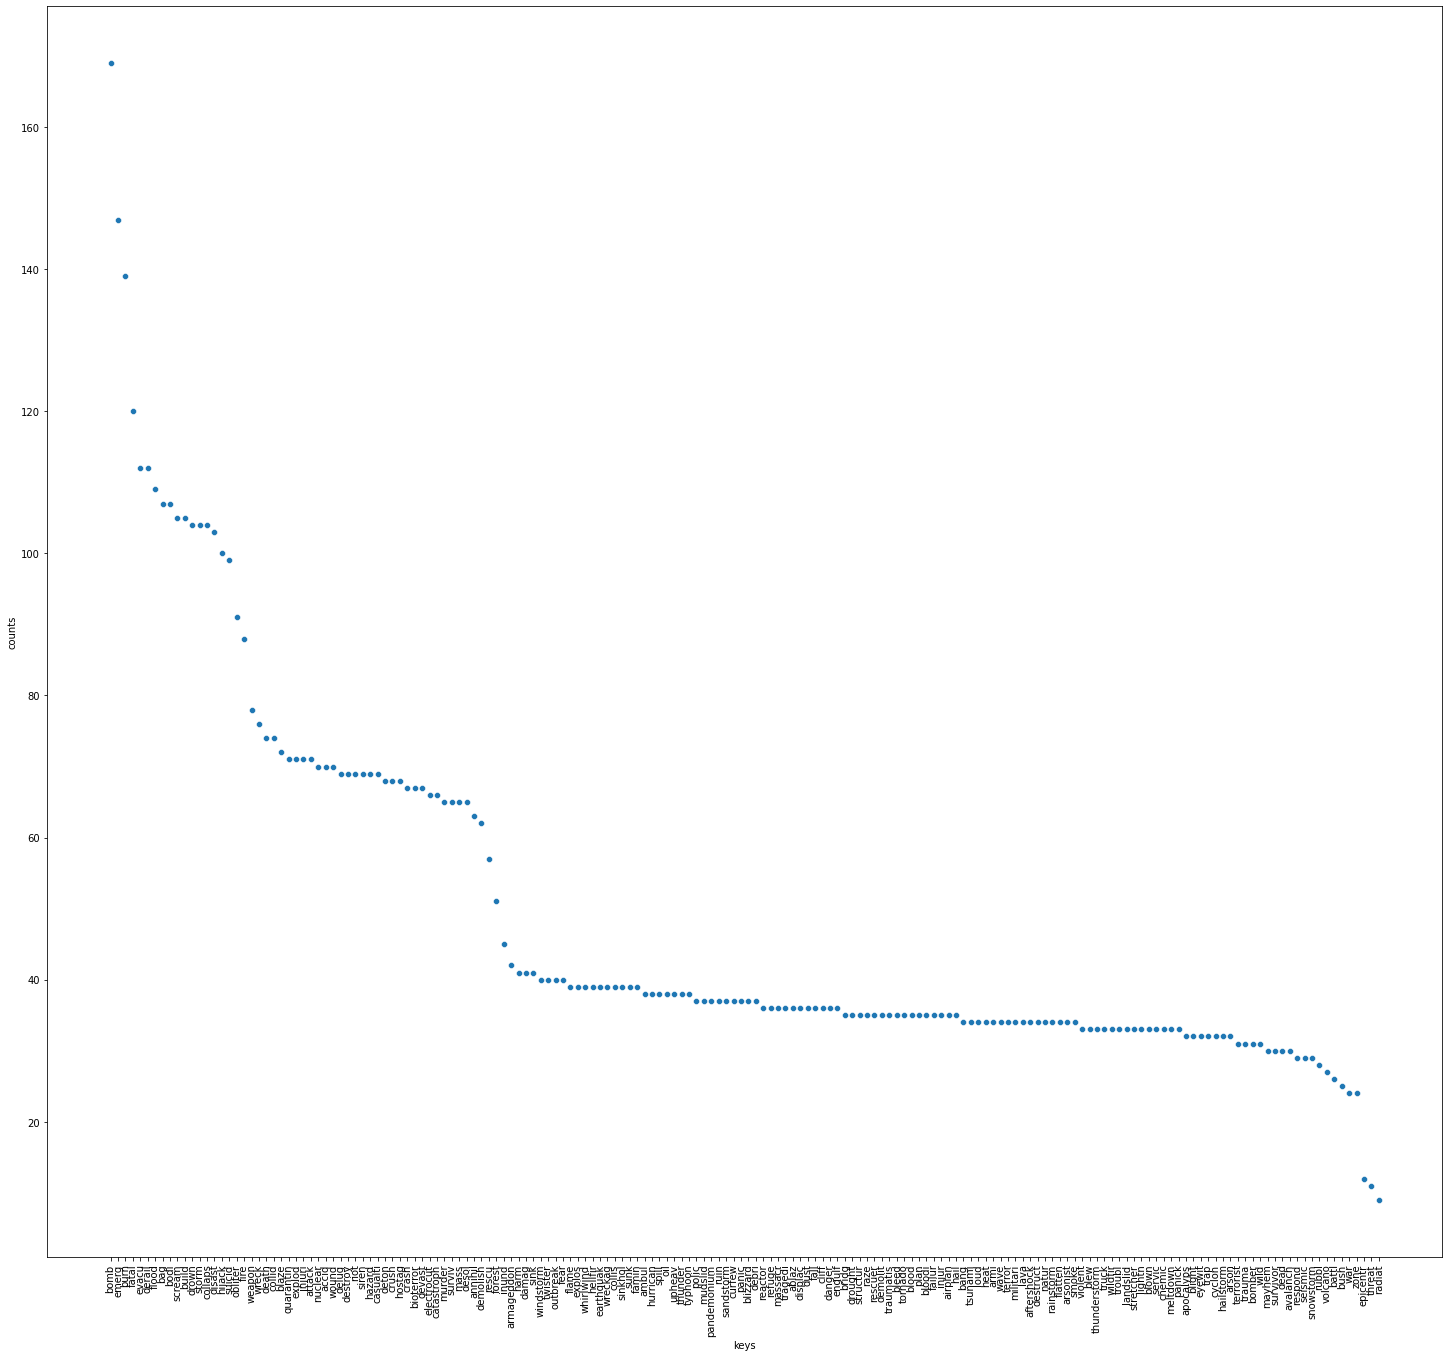

In [158]:
import seaborn as sns
plt.figure(figsize=(25,23))
plt.xticks(rotation = 90) 
sns.scatterplot(data=all_keys_count,x='keys',y='counts')